# **CAPSTONE PROJECT 1: NHANES Body Measurements Analysis**

###This notebook analyzes NHANES adult male and female body measurement data
### It covers data loading, visualization, statistical analysis, standardization, and interpretation.

# Loading the data

*Note: Please upload the CSV files locally*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, zscore

# 1. Load the Data
female_df = pd.read_csv("nhanes_adult_female_bmx_2020.csv", skiprows=18)
male_df = pd.read_csv("nhanes_adult_male_bmx_2020.csv", skiprows=18)

female = female_df.to_numpy()
male = male_df.to_numpy()

#Histogram Plot

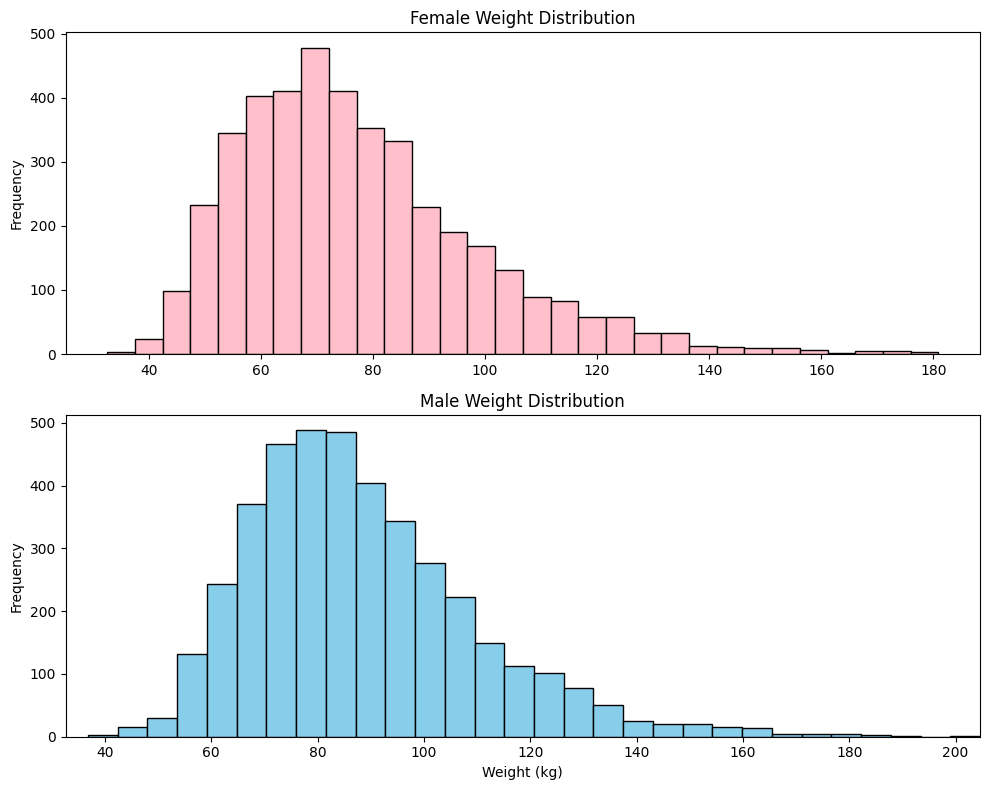

In [ ]:
# 2. Visualize Histograms
female_weights = female[:, 0]
male_weights = male[:, 0]

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color='pink', edgecolor='black')
plt.title('Female Weight Distribution')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color='skyblue', edgecolor='black')
plt.title('Male Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

common_xlim = [min(female_weights.min(), male_weights.min()), max(female_weights.max(), male_weights.max())]
plt.xlim(common_xlim)
plt.tight_layout()
plt.show()

#Weight Comparison


/tmp/ipython-input-6-2125203286.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])


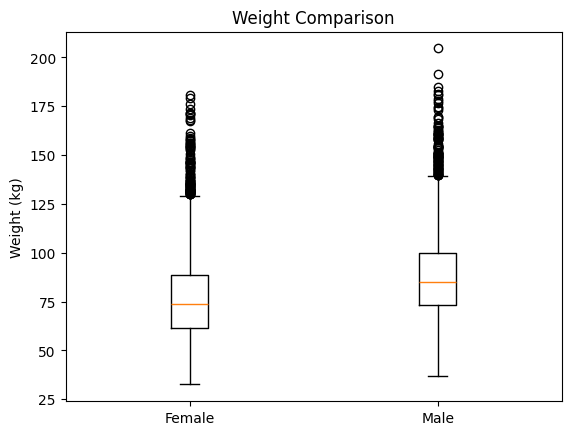

In [ ]:
# 3. Boxplot for Weight Comparison
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title("Weight Comparison")
plt.ylabel("Weight (kg)")
plt.show()

**Interpretation:**

1. Median weight is higher among male participants than female participants.
2. The interquartile range (IQR), which represents the middle 50% of data, is also broader for males, suggesting greater variability.
3. Male participants show more upper outliers, possibly reflecting individuals with significantly higher weights.
4. Female weights appear slightly more concentrated around the median, indicating less dispersion.
5. Overall, the boxplot confirms that adult males in the dataset generally weigh more and exhibit more variation in weight compared to adult females.
6. This visualization helps quickly assess the central tendency and spread, which is crucial in health and nutrition studies.

# Male Female Weight Summary

In [ ]:
# 4. Statistical Summary
def describe_stats(values):
    return {
        "Mean": np.mean(values),
        "Median": np.median(values),
        "Std Dev": np.std(values),
        "Skew": pd.Series(values).skew(),
        "Min": np.min(values),
        "Max": np.max(values)
    }

female_stats = describe_stats(female_weights)
male_stats = describe_stats(male_weights)

print("Female Stats:\n", female_stats)
print("\nMale Stats:\n", male_stats)

Female Stats:
 {'Mean': np.float64(77.40379057095475), 'Median': np.float64(73.6), 'Std Dev': np.float64(21.54250829019315), 'Skew': np.float64(1.033728460112216), 'Min': np.float64(32.6), 'Max': np.float64(180.9)}

Male Stats:
 {'Mean': np.float64(88.36454300416565), 'Median': np.float64(85.0), 'Std Dev': np.float64(21.418936717962495), 'Skew': np.float64(0.9846430235310972), 'Min': np.float64(36.8), 'Max': np.float64(204.6)}


#BMI addition to Female dataset

In [ ]:
# 5. Add BMI to Female Dataset
# BMI = weight (kg) / (height (m)^2)
height_m = female[:, 1] / 100  # convert cm to meters
bmi = female[:, 0] / (height_m ** 2)
female_bmi = np.column_stack((female, bmi))


#Z-Score

In [ ]:
# 6. Standardize Female Data (Z-Scores)
zfemale = zscore(female_bmi, axis=0)

#Scatterplot and Co-relation Matrix

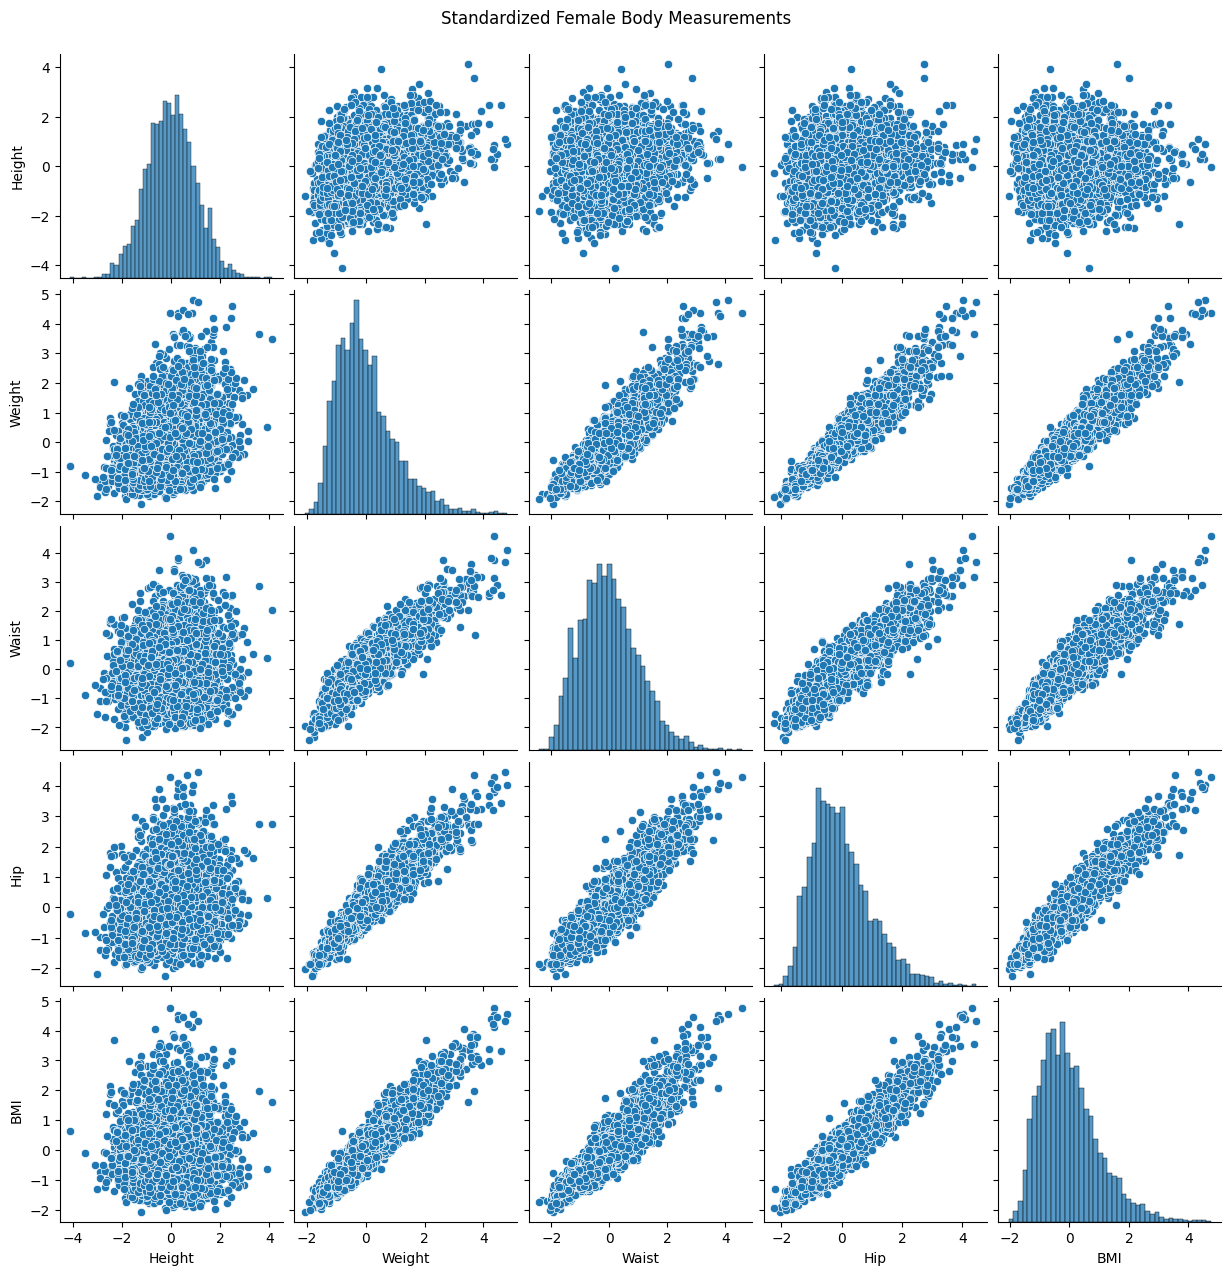


Correlation Coefficients:
Height vs Weight: Pearson = 0.35, Spearman = 0.34
Height vs Waist: Pearson = 0.13, Spearman = 0.11
Height vs Hip: Pearson = 0.20, Spearman = 0.21
Height vs BMI: Pearson = 0.03, Spearman = 0.02
Weight vs Waist: Pearson = 0.90, Spearman = 0.90
Weight vs Hip: Pearson = 0.95, Spearman = 0.95
Weight vs BMI: Pearson = 0.95, Spearman = 0.94
Waist vs Hip: Pearson = 0.90, Spearman = 0.89
Waist vs BMI: Pearson = 0.92, Spearman = 0.92
Hip vs BMI: Pearson = 0.94, Spearman = 0.93


In [ ]:
# 7. Scatterplot Matrix + Correlations (height, weight, waist, hip, BMI)
zf_df = pd.DataFrame(zfemale[:, [1, 0, 6, 5, 7]], columns=['Height', 'Weight', 'Waist', 'Hip', 'BMI'])
sns.pairplot(zf_df)
plt.suptitle("Standardized Female Body Measurements", y=1.02)
plt.show()

print("\nCorrelation Coefficients:")
for i in range(zf_df.shape[1]):
    for j in range(i+1, zf_df.shape[1]):
        p_corr, _ = pearsonr(zf_df.iloc[:, i], zf_df.iloc[:, j])
        s_corr, _ = spearmanr(zf_df.iloc[:, i], zf_df.iloc[:, j])
        print(f"{zf_df.columns[i]} vs {zf_df.columns[j]}: Pearson = {p_corr:.2f}, Spearman = {s_corr:.2f}")

#Adding Ratios

In [ ]:
# 8. Add waist-to-height and waist-to-hip ratios to both datasets
female_ratios = np.column_stack((female_bmi, female[:, 6]/female[:, 1], female[:, 6]/female[:, 5]))
male_ratios = np.column_stack((male, male[:, 6]/male[:, 1], male[:, 6]/male[:, 5]))




#Ratio Comparison

/tmp/ipython-input-16-1562358100.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


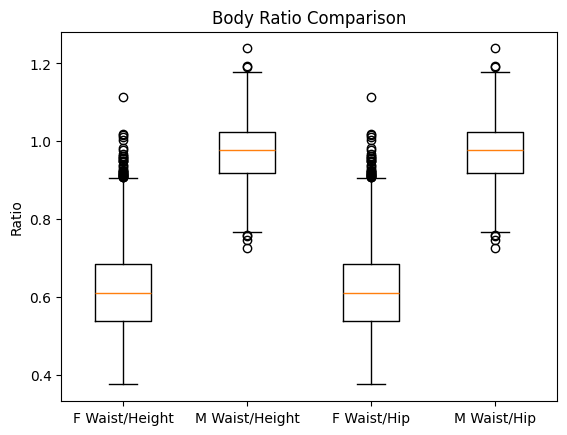

In [ ]:
# 9. Boxplot Comparing Ratios
plt.boxplot([
female_ratios[:, 8], male_ratios[:, 8],
female_ratios[:, 8], male_ratios[:, 8]
],
            labels=["F Waist/Height", "M Waist/Height", "F Waist/Hip", "M Waist/Hip"])
plt.title("Body Ratio Comparison")
plt.ylabel("Ratio")
plt.show()


#**Advantages and Disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio**

**1. Body Mass Index (BMI)**

What it is: A measure of body fat based on weight and height (kg/m²).

*✅ Advantages:*
1. Simple & quick to calculate using just height and weight.
2. Widely used in medical and health assessments.
3. Good for general population screening of underweight or obesity.

*❌ Disadvantages:*
1. Doesn’t consider muscle mass vs. fat — muscular people can be misclassified as overweight.
2. Doesn’t reflect fat distribution (e.g., belly fat).
3. May not be accurate for older adults, athletes, or people of different ethnicities.

**2. Waist-to-Height Ratio (WHtR)**

What it is: Waist circumference divided by height — reflects abdominal fat.

*✅ Advantages:*
1. Better indicator of central obesity than BMI.
2. More closely linked to heart disease and diabetes risk.
3. Works across genders, ages, and ethnicities more consistently.

*❌ Disadvantages:*
1. Requires accurate waist measurement, which can vary based on technique.
2. Less commonly used, so reference values are less standardized than BMI.

**Waist-to-Hip Ratio (WHR)**

What it is: Waist circumference divided by hip circumference — indicates fat distribution.

*✅ Advantages:*
1. Helps assess fat distribution (apple-shaped vs. pear-shaped body).
2. Associated with risk of cardiovascular disease and stroke.

*❌ Disadvantages:*
1. Measurements can be inconsistent if not taken properly.
2. Not as reliable for people with very low or very high body fat.



#Standardized Profiles of Extremes

In [ ]:
# 11. Standardized Profiles of Extremes (Lowest and Highest BMI)
bmi_column = zfemale[:, 7]
bmi_sorted_indices = np.argsort(bmi_column)
lowest_bmi_profiles = zfemale[bmi_sorted_indices[:5]]
highest_bmi_profiles = zfemale[bmi_sorted_indices[-5:]]

print("\nLowest BMI Profiles:\n", lowest_bmi_profiles)
print("\nHighest BMI Profiles:\n", highest_bmi_profiles)



Lowest BMI Profiles:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]

Highest BMI Profiles:
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037 -0.05585782 -0.17357

**Interpretation:**
1. Lowest BMI Participants tend to have negative z-scores across weight, waist, and hip circumference — suggesting they are below the average in overall body mass and body fat distribution.
2. Highest BMI Participants show high positive z-scores, especially in waist and hip circumference, indicating high fat accumulation in those areas.
3. While height does contribute to BMI, the most distinguishing features among high-BMI individuals were their waist and hip z-scores, often > +2 SD.
4. This demonstrates how z-scores help us standardise and compare body dimensions across individuals, regardless of the units of measurement.


Thanks

Sai Geetanjali Tammina